<a href="https://colab.research.google.com/github/UsmanMcGill/Medium-Articles-Notebooks/blob/main/GPT_wiki_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages('did')

In [3]:
# Load the required package

library(did)
library(readr)

In [ ]:
# Specify the path to your CSV file
file_path <- "/content/df_did_week_R2_HMLX.csv"

# Read the CSV file
df <- read_csv(file_path)

In [ ]:
print(df)

# A tibble: 3,036 × 15
    year  week `year-week` project  page_views lang  Cat   treatment_group  time
   <dbl> <dbl> <chr>       <chr>         <dbl> <chr> <chr>           <dbl> <dbl>
 1  2021     1 2021-01     en.wiki… 2340542633 en    H                   1     0
 2  2021     1 2021-01     fa.wiki…   55568366 fa    M                   0     0
 3  2021     1 2021-01     pl.wiki…   80044742 pl    H                   1     0
 4  2021     1 2021-01     fr.wiki…  236090765 fr    H                   1     0
 5  2021     1 2021-01     id.wiki…   35431917 id    M                   0     0
 6  2021     1 2021-01     th.wiki…   17459697 th    M                   0     0
 7  2021     1 2021-01     es.wiki…  236264713 es    H                   1     0
 8  2021     1 2021-01     ko.wiki…   27838095 ko    M                   0     0
 9  2021     1 2021-01     el.wiki…   13966470 el    M                   0     0
10  2021     1 2021-01     de.wiki…  285689505 de    H                   1     0
# ℹ 3

In [ ]:
df$treatment_group_24 <- ifelse(df$treatment_group == 1, 24, df$treatment_group)

## DID all lang (27) with 12 month avg Normalization

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = NULL, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    2  -0.4418     0.0501       -0.5810     -0.3027 *
    24    3   0.3625     0.0387        0.2550      0.4701 *
    24    4   0.0569     0.0164        0.0112      0.1025 *
    24    5  -0.0020     0.0124       -0.0364      0.0323  
    24    6  -0.0822     0.0464       -0.2110      0.0466  
    24    7   0.0465     0.0408       -0.0668      0.1597  
    24    8  -0.0856     0.0245       -0.1538     -0.0174 *
    24    9  -0.0795     0.0251       -0.1493     -0.0098 *

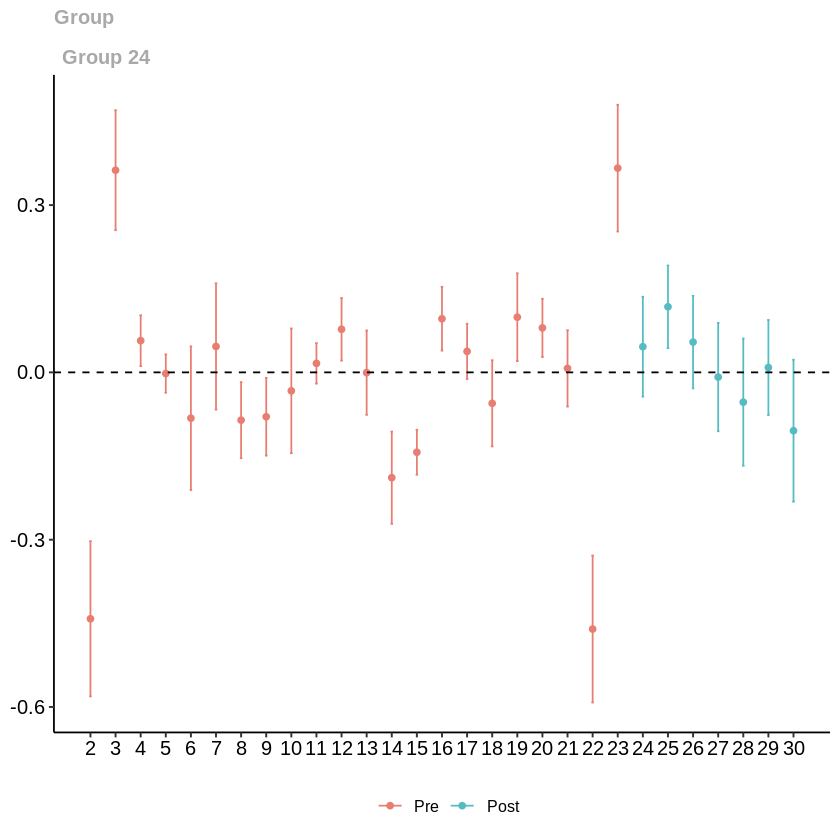

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT's
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
    ATT    Std. Error     [ 95%  Conf. Int.] 
 0.0086        0.0288    -0.0478       0.065 


Group Effects:
 Group Estimate Std. Error [95% Pointwise  Conf. Band] 
    24   0.0086     0.0294         -0.0489      0.0662 
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID all lang (27) with 12 month avg Normalization and controling for Quarter Effect

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= ~ quarter_lang,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = ~quarter_lang, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    2  -0.4427     0.0532       -0.5900     -0.2954 *
    24    3   0.3631     0.0414        0.2484      0.4778 *
    24    4   0.0572     0.0178        0.0079      0.1066 *
    24    5  -0.0019     0.0125       -0.0366      0.0328  
    24    6  -0.0832     0.0459       -0.2102      0.0439  
    24    7   0.0473     0.0433       -0.0726      0.1671  
    24    8  -0.0852     0.0246       -0.1535     -0.0169 *
    24    9  -0.0801     0.0257       -0.1514     

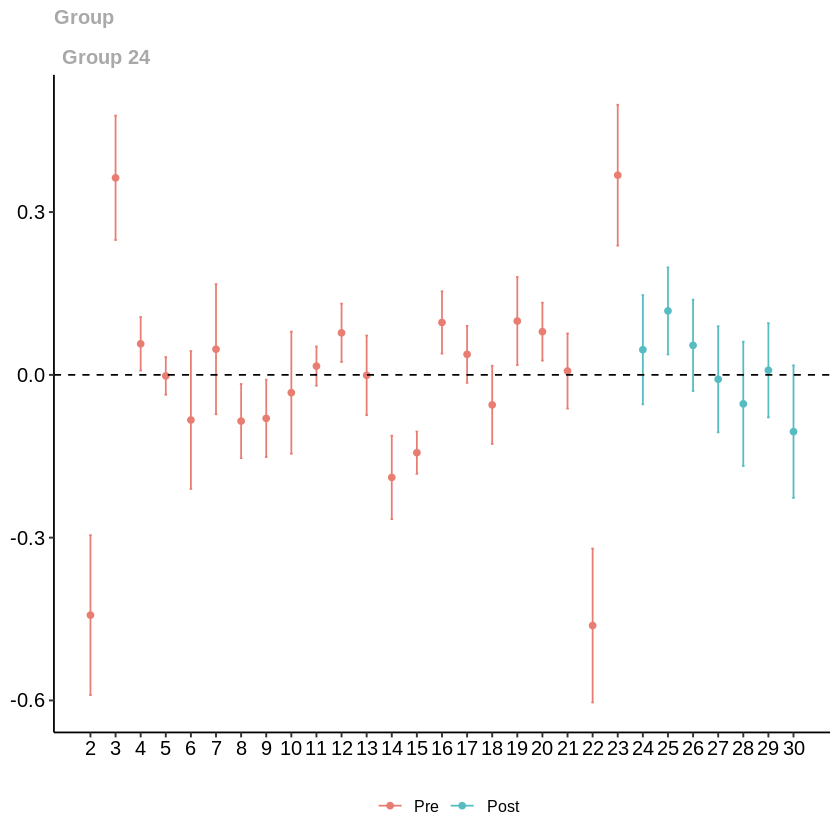

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
    ATT    Std. Error     [ 95%  Conf. Int.] 
 0.0087        0.0301    -0.0502      0.0676 


Group Effects:
 Group Estimate Std. Error [95% Pointwise  Conf. Band] 
    24   0.0087     0.0309         -0.0519      0.0693 
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID all lang (27) with 6 month rolling avg Normalization

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)

### DID all lang (27) with 6 month rolling avg Normalization and controling for Quarter Effect

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = NULL, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    8  -0.2021     0.0247       -0.2715     -0.1328 *
    24    9  -0.0403     0.0300       -0.1245      0.0440  
    24   10  -0.0202     0.0213       -0.0799      0.0395  
    24   11   0.0957     0.0147        0.0545      0.1369 *
    24   12   0.1306     0.0198        0.0750      0.1861 *
    24   13   0.0263     0.0169       -0.0211      0.0737  
    24   14  -0.2084     0.0220       -0.2703     -0.1465 *
    24   15  -0.0782     0.0134       -0.1159     -0.0406 *

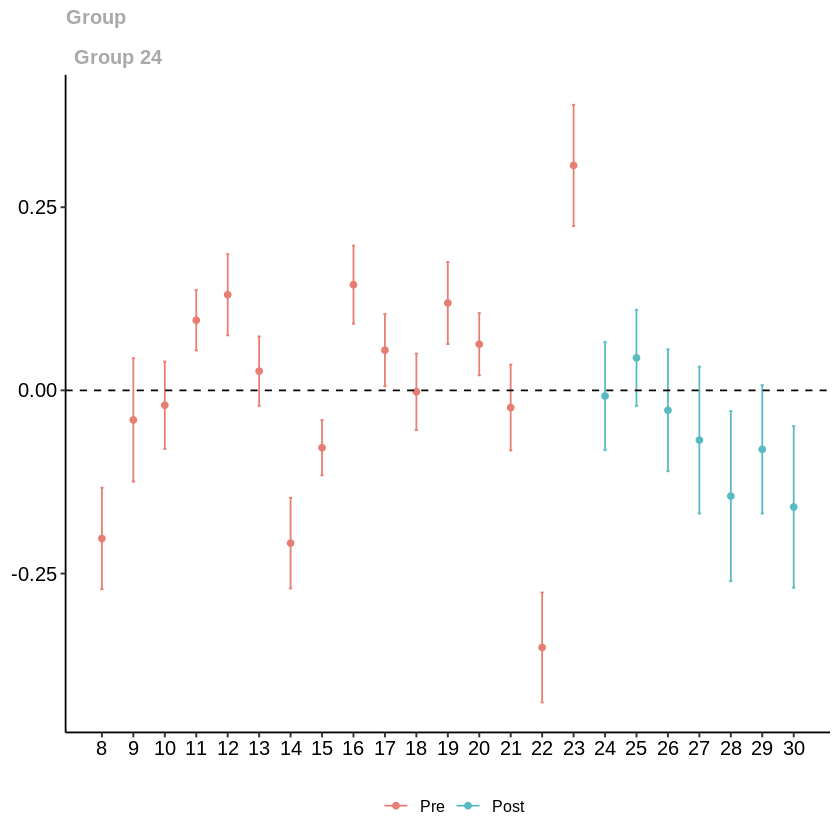

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.]  
 -0.0631        0.0296    -0.1212     -0.0051 *


Group Effects:
 Group Estimate Std. Error [95% Pointwise  Conf. Band]  
    24  -0.0631     0.0279         -0.1178     -0.0085 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


## DID High (H)-Low(MLX) group with 12 month avg Normalization

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = NULL, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    2  -0.0625     0.0319       -0.1512      0.0261  
    24    3   0.0776     0.0239        0.0110      0.1441 *
    24    4   0.0499     0.0210       -0.0085      0.1084  
    24    5  -0.0116     0.0243       -0.0793      0.0561  
    24    6  -0.0702     0.0329       -0.1618      0.0215  
    24    7  -0.0830     0.0376       -0.1875      0.0215  
    24    8  -0.0356     0.0347       -0.1322      0.0609  
    24    9  -0.0085     0.0285       -0.0877      0.0708  

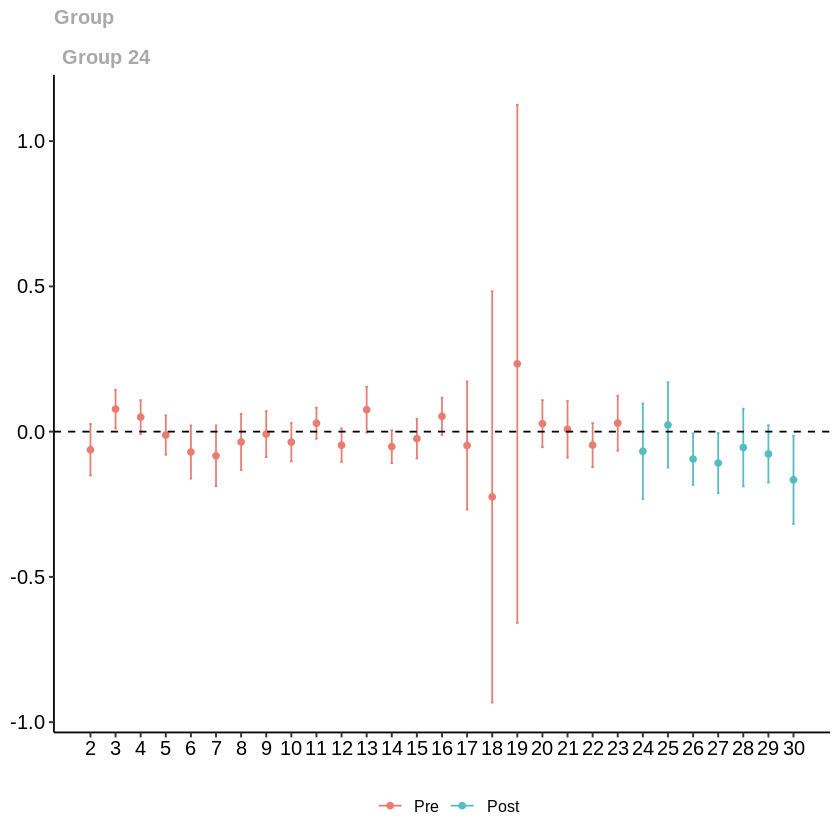

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.]  
 -0.0778        0.0342    -0.1447     -0.0108 *


Group Effects:
 Group Estimate Std. Error [95% Pointwise  Conf. Band]  
    24  -0.0778     0.0336         -0.1436     -0.0119 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID High(H)-Low(MLX) group with 6 month rolling avg Normalization

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = NULL, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    8  -0.0253     0.0463       -0.1511      0.1006  
    24    9   0.0205     0.0358       -0.0770      0.1179  
    24   10  -0.0044     0.0303       -0.0869      0.0781  
    24   11   0.0782     0.0246        0.0113      0.1451 *
    24   12  -0.0135     0.0197       -0.0671      0.0402  
    24   13   0.0864     0.0276        0.0114      0.1614 *
    24   14  -0.0399     0.0216       -0.0985      0.0188  
    24   15  -0.0117     0.0220       -0.0714      0.0481  

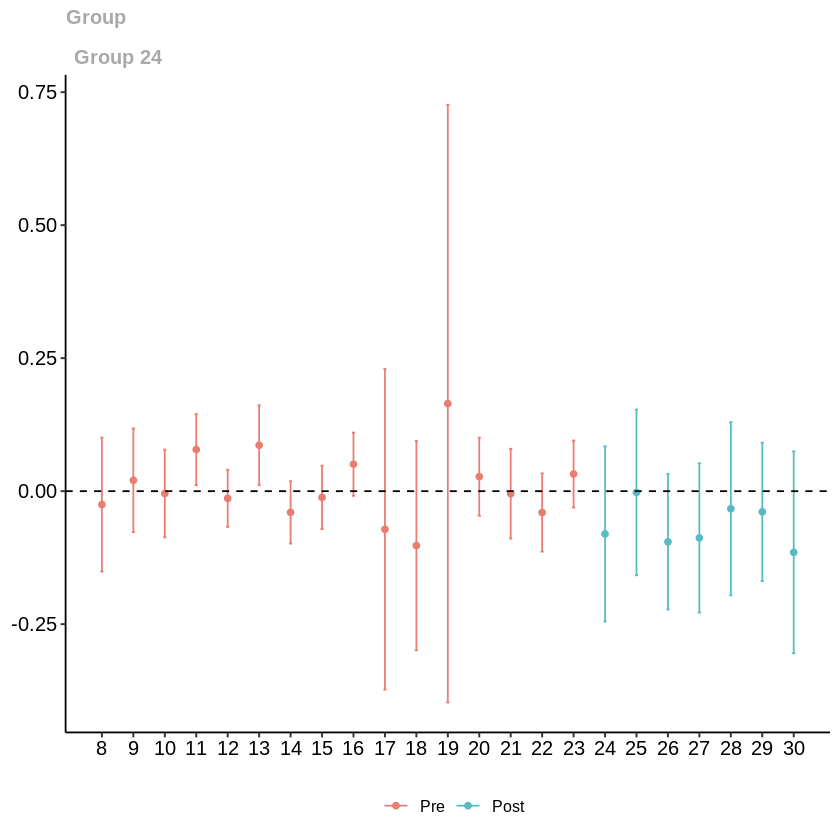

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.] 
 -0.0646        0.0504    -0.1633       0.034 


Group Effects:
 Group Estimate Std. Error [95% Pointwise  Conf. Band] 
    24  -0.0646      0.048         -0.1586      0.0293 
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID High (H)-Low(M) group with 12 month avg Normalization

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = NULL, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band] 
    24    2   0.0229     0.0348       -0.0720      0.1177 
    24    3   0.0291     0.0192       -0.0233      0.0814 
    24    4   0.0477     0.0410       -0.0643      0.1597 
    24    5   0.0083     0.0258       -0.0621      0.0788 
    24    6  -0.0228     0.0475       -0.1522      0.1067 
    24    7  -0.0307     0.0334       -0.1218      0.0603 
    24    8  -0.0270     0.0215       -0.0857      0.0316 
    24    9  -0.0170     0.0290       -0.0963      0.0622 
    24  

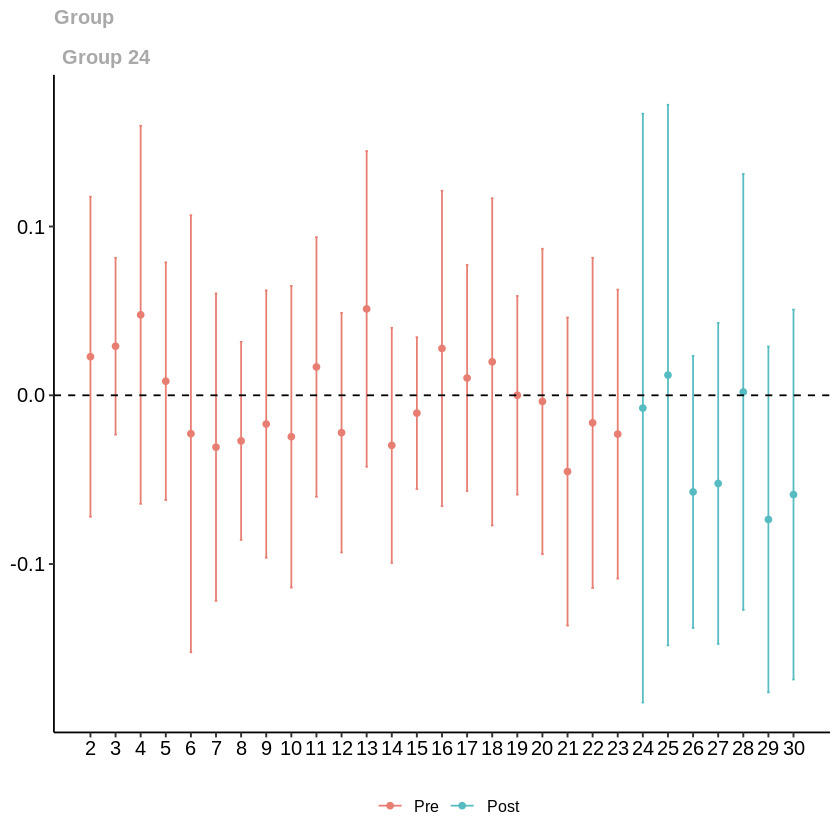

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.] 
 -0.0337        0.0301    -0.0927      0.0254 


Group Effects:
 Group Estimate Std. Error [95% Pointwise  Conf. Band] 
    24  -0.0337     0.0321         -0.0967      0.0293 
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID High (H)-Low(M) group with 12 month avg Normalization and controling for Quarter Effect

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= ~ quarter_lang,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = ~quarter_lang, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band] 
    24    2   0.0195     0.0350       -0.0740      0.1129 
    24    3   0.0328     0.0213       -0.0242      0.0898 
    24    4   0.0419     0.0386       -0.0613      0.1450 
    24    5   0.0054     0.0264       -0.0652      0.0759 
    24    6  -0.0188     0.0566       -0.1701      0.1325 
    24    7  -0.0320     0.0383       -0.1342      0.0703 
    24    8  -0.0268     0.0238       -0.0904      0.0369 
    24    9  -0.0180     0.0335       -0.1075      0.0716 

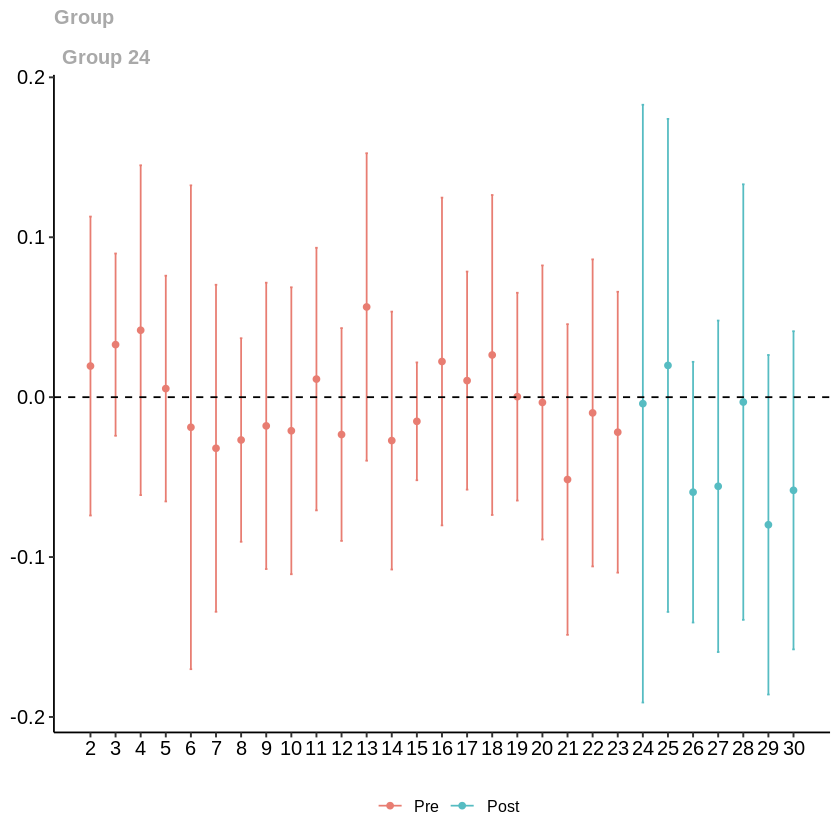

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.] 
 -0.0344        0.0293    -0.0919      0.0232 


Group Effects:
 Group Estimate Std. Error [95% Pointwise  Conf. Band] 
    24  -0.0344     0.0298         -0.0929      0.0241 
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID High (H)-Low(M) group with 6 month rolling avg Normalization
(too few data points)

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)

## 3 Groups (H, M, LX) with 12 month avg Normalization
group 24 = H, group M = 25,  group L & X = 0,  

(controling for Quarter Effect exacerbate the results further maybe because the data point are low)

In [ ]:
# Assuming you have a dataframe named df
library(dplyr)

# Define the mapping
mapping <- setNames(c(24, 25, 0), c(1, 2, 0))

# Create the new column
df <- df %>%
  mutate(treatment_group_24 = recode(treatment_group, !!!mapping))

In [ ]:
df$treatment_group_24

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= ~1,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = ~1, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    2  -0.1296     0.0386       -0.2405     -0.0187 *
    24    3   0.1157     0.0308        0.0275      0.2039 *
    24    4   0.0517     0.0187       -0.0019      0.1053  
    24    5  -0.0273     0.0316       -0.1180      0.0635  
    24    6  -0.1074     0.0403       -0.2231      0.0083  
    24    7  -0.1240     0.0613       -0.2997      0.0517  
    24    8  -0.0424     0.0605       -0.2159      0.1311  
    24    9  -0.0017     0.0421       -0.1224      0.1190  
 

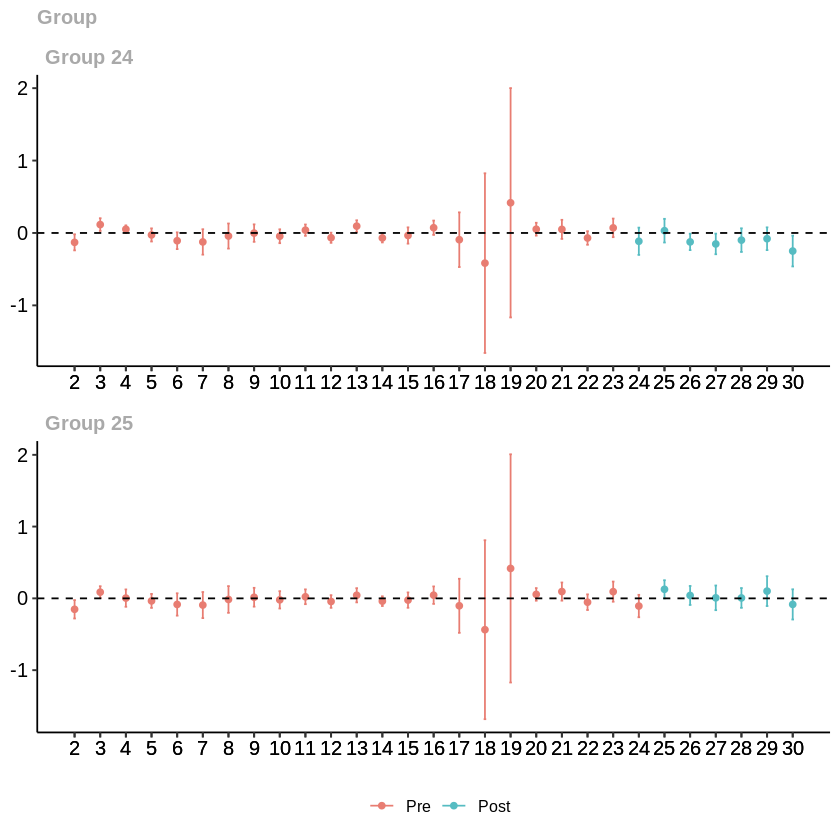

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
    ATT    Std. Error     [ 95%  Conf. Int.] 
 -0.043        0.0344    -0.1103      0.0244 


Group Effects:
 Group Estimate Std. Error [95% Simult.  Conf. Band]  
    24  -0.1124     0.0435       -0.2035     -0.0213 *
    25   0.0328     0.0456       -0.0627      0.1283  
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


## 3 Groups (H, ML, X0) with 12 month avg Normalization

group 24 = H, group M & L = 25, group X & 0(never treated) = 0,

In [ ]:
df$treatment_group_new

In [ ]:
# Assuming you have a dataframe named df
library(dplyr)

# Define the mapping
mapping <- setNames(c(24, 25, 0), c(1, 2, 0))

# Create the new column
df <- df %>%
  mutate(treatment_group_24 = recode(treatment_group_new, !!!mapping))

In [ ]:
df$treatment_group_24

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= ~ quarter_lang,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = ~quarter_lang, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    2  -0.5662     0.0391       -0.6804     -0.4519 *
    24    3   0.4686     0.0293        0.3829      0.5543 *
    24    4   0.0928     0.0165        0.0445      0.1410 *
    24    5  -0.0061     0.0179       -0.0583      0.0462  
    24    6  -0.1132     0.0555       -0.2756      0.0491  
    24    7   0.0153     0.0510       -0.1338      0.1644  
    24    8  -0.1251     0.0218       -0.1889     -0.0613 *
    24    9  -0.0858     0.0225       -0.1515     

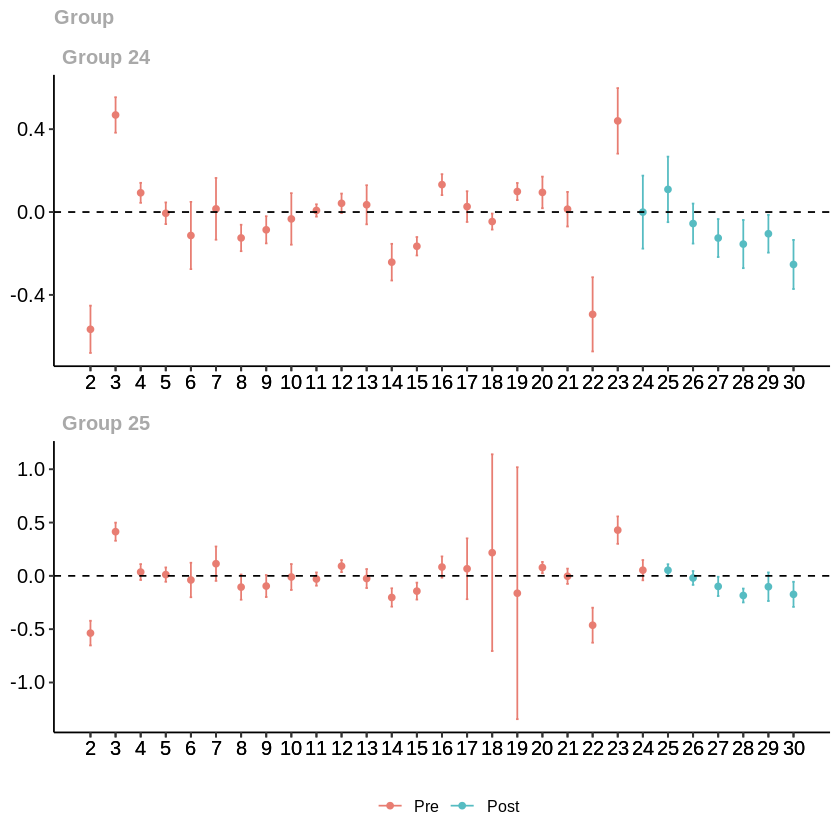

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
    ATT    Std. Error     [ 95%  Conf. Int.]  
 -0.086        0.0181    -0.1216     -0.0505 *


Group Effects:
 Group Estimate Std. Error [95% Simult.  Conf. Band]  
    24  -0.0836     0.0346       -0.1602     -0.0070 *
    25  -0.0875     0.0240       -0.1407     -0.0343 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


#### Without Quarter Effect

In [ ]:
my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= ~ NULL,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = ~NULL, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    2  -0.5598     0.0376       -0.6685     -0.4511 *
    24    3   0.4642     0.0268        0.3866      0.5417 *
    24    4   0.0900     0.0139        0.0500      0.1301 *
    24    5  -0.0070     0.0197       -0.0641      0.0500  
    24    6  -0.1049     0.0464       -0.2390      0.0292  
    24    7   0.0090     0.0431       -0.1156      0.1336  
    24    8  -0.1285     0.0198       -0.1858     -0.0713 *
    24    9  -0.0816     0.0226       -0.1471     -0.0162 

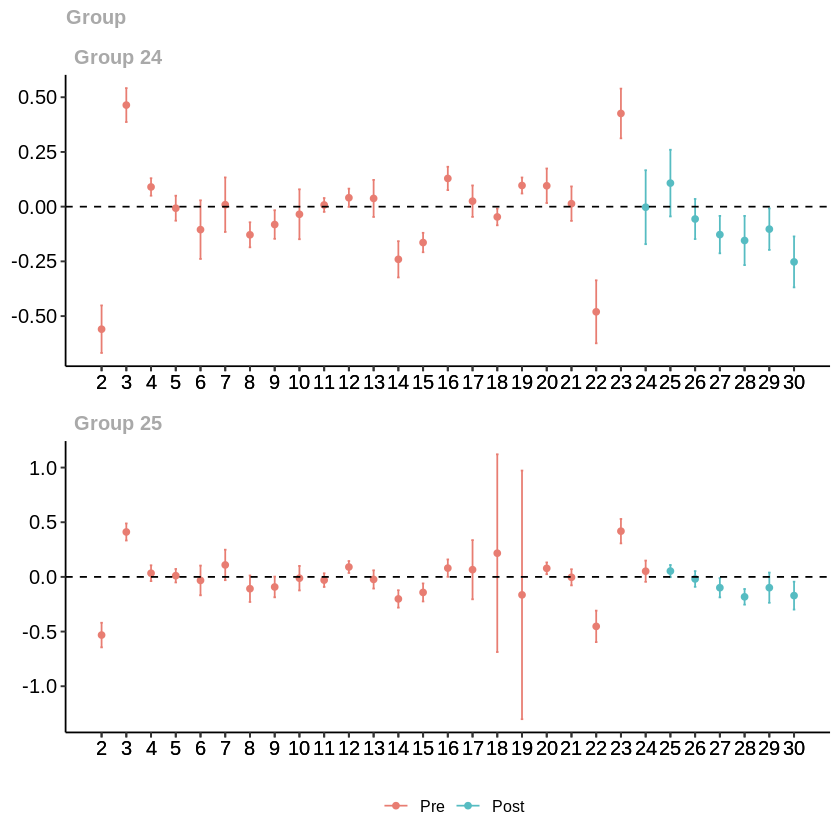

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 95%  Conf. Int.]  
 -0.0854        0.0204    -0.1253     -0.0454 *


Group Effects:
 Group Estimate Std. Error [95% Simult.  Conf. Band]  
    24  -0.0841     0.0306       -0.1479     -0.0202 *
    25  -0.0861     0.0242       -0.1367     -0.0356 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### 3 Groups (H, ML, X0) with 6 month rolling average Normalization

group 24 = H, group M & L = 25, group X & 0(never treated) = 0,

In [ ]:
df$treatment_group_new

In [ ]:
# Assuming you have a dataframe named df
library(dplyr)

# Define the mapping
mapping <- setNames(c(24, 25, 0), c(1, 2, 0))

# Create the new column
df <- df %>%
  mutate(treatment_group_24 = recode(treatment_group_new, !!!mapping))

In [ ]:
df$treatment_group_24

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_month_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_24",
                   xformla= ~ quarter_lang,
                   data = df
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_month_rank", 
    idname = "lang_rank", gname = "treatment_group_24", xformla = ~quarter_lang, 
    data = df)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [95% Simult.  Conf. Band]  
    24    8  -0.2523     0.0214       -0.3139     -0.1908 *
    24    9  -0.0345     0.0235       -0.1019      0.0329  
    24   10  -0.0051     0.0195       -0.0611      0.0509  
    24   11   0.1054     0.0107        0.0747      0.1361 *
    24   12   0.1160     0.0139        0.0762      0.1558 *
    24   13   0.0785     0.0243        0.0085      0.1484 *
    24   14  -0.2528     0.0251       -0.3249     -0.1806 *
    24   15  -0.0862     0.0151       -0.1296     

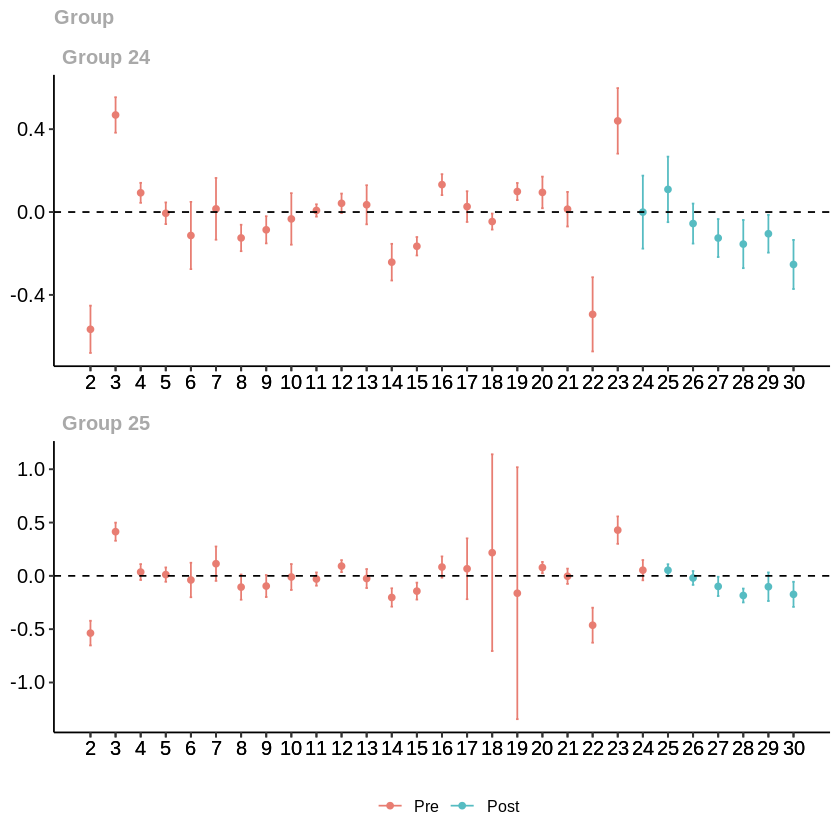

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
    ATT    Std. Error     [ 95%  Conf. Int.]  
 -0.086        0.0181    -0.1216     -0.0505 *


Group Effects:
 Group Estimate Std. Error [95% Simult.  Conf. Band]  
    24  -0.0836     0.0346       -0.1602     -0.0070 *
    25  -0.0875     0.0240       -0.1407     -0.0343 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


## Weekly Data

### Data Prepration

In [ ]:
# Specify the path to your CSV file
file_path <- "/content/df_did_week_3.csv"

# Read the CSV file
df <- read_csv(file_path)

Rows: 42504 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): year-week, project, lang, Cat, quarter
dbl (12): year, week, page_views, time, treatment_group, treated, year_week_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [5]:
print(df)

# A tibble: 4,884 × 17
    year  week `year-week` project  page_views lang  Cat    time treatment_group
   <dbl> <dbl> <chr>       <chr>         <dbl> <chr> <chr> <dbl>           <dbl>
 1  2021     1 2021-01     en.wiki… 2340542633 en    H         0               1
 2  2021     1 2021-01     es.wiki…  236264713 es    H         0               1
 3  2021     1 2021-01     sw.wiki…    1140079 sw    X         0               0
 4  2021     1 2021-01     ko.wiki…   27838095 ko    M         0               0
 5  2021     1 2021-01     el.wiki…   13966470 el    M         0               0
 6  2021     1 2021-01     te.wiki…    1658067 te    L         0               0
 7  2021     1 2021-01     pl.wiki…   80044742 pl    H         0               1
 8  2021     1 2021-01     as.wiki…     295631 as    X         0               0
 9  2021     1 2021-01     de.wiki…  285689505 de    H         0               1
10  2021     1 2021-01     ml.wiki…    2029349 ml    L         0               0
# ℹ 4

In [6]:
df$treatment_group_102 <- ifelse(df$treatment_group == 1, 102, df$treatment_group)

In [ ]:
df$treatment_group_102

In [ ]:
# Load necessary library
library(dplyr)

# Convert 'year_week' column to Date type
df$date <- as.Date(paste(df$`year-week`, 1), format="%Y-%W %u")

In [17]:
# Define 'year-week' range
start_date <- as.Date("2022-07-01")
#end_date <- as.Date("2022-12-31")

In [18]:
# Filter dataframe
#df_filtered <- df %>%
  #filter(year_week >= start_date & year_week <= end_date)

# Filter dataframe
df_filtered <- df %>%
  filter(date >= start_date)


In [ ]:
# Print the filtered dataframe
print(df_filtered)

### DID all lang (27) with 24 week avg Normalization

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_week_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_102",
                   xformla= ~quarter_lang,
                   alp = 0.1,
                   data = df_filtered,
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_week_rank", 
    idname = "lang_rank", gname = "treatment_group_102", xformla = ~quarter_lang, 
    data = df_filtered, alp = 0.1)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [90% Simult.  Conf. Band]  
   102   81  -0.0036     0.0106       -0.0322      0.0250  
   102   82   0.1433     0.0186        0.0930      0.1936 *
   102   83  -0.0049     0.0217       -0.0637      0.0540  
   102   84   0.0580     0.0085        0.0351      0.0810 *
   102   85  -0.1175     0.0181       -0.1666     -0.0685 *
   102   86   0.0943     0.0222        0.0343      0.1544 *
   102   87  -0.0807     0.0186       -0.1310     -0.0304 *
   102   88   0.0166     0.016

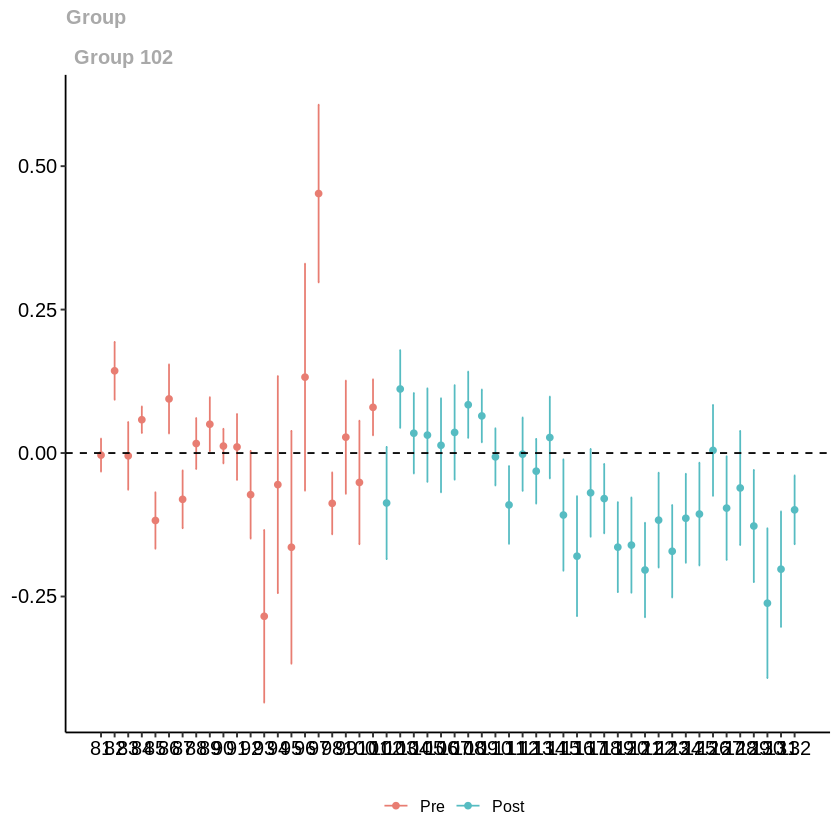

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 90%  Conf. Int.]  
 -0.0687        0.0206    -0.1026     -0.0348 *


Group Effects:
 Group Estimate Std. Error [90% Pointwise  Conf. Band]  
   102  -0.0687     0.0206         -0.1025     -0.0349 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID High (H)-Low(M) group

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_week_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_102",
                   xformla= ~quarter_lang,
                   alp = 0.1,
                   data = df_filtered,
                   )

Warning message in att_gt(yname = "normalized_page_views", tname = "year_week_rank", :
“Not returning pre-test Wald statistic due to singular covariance matrix”


In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_week_rank", 
    idname = "lang_rank", gname = "treatment_group_102", xformla = ~quarter_lang, 
    data = df_filtered, alp = 0.1)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [90% Simult.  Conf. Band] 
   102   72  -0.0040     0.0306       -0.0862      0.0783 
   102   73  -0.0353     0.0177       -0.0829      0.0123 
   102   74   0.0431     0.0297       -0.0367      0.1229 
   102   75   0.0214     0.0250       -0.0459      0.0887 
   102   76  -0.0025     0.0143       -0.0408      0.0359 
   102   77   0.0050     0.0111       -0.0248      0.0348 
   102   78  -0.0049     0.0118       -0.0366      0.0267 
   102   79  -0.0038     0.0154       

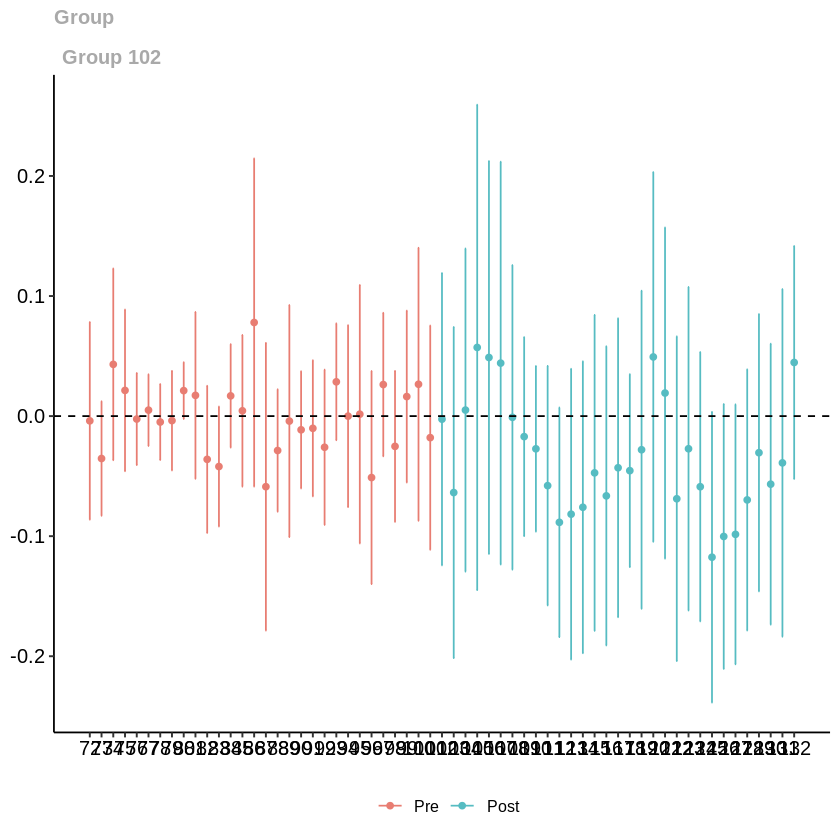

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 90%  Conf. Int.] 
 -0.0337        0.0278    -0.0795      0.0121 


Group Effects:
 Group Estimate Std. Error [90% Pointwise  Conf. Band] 
   102  -0.0337     0.0268         -0.0777      0.0103 
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### DID High (H)-Low(MLX) group

In [19]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_week_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_102",
                   xformla= ~quarter_lang,
                   alp = 0.1,
                   data = df_filtered,
                   )

In [20]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_week_rank", 
    idname = "lang_rank", gname = "treatment_group_102", xformla = ~quarter_lang, 
    data = df_filtered, alp = 0.1)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [90% Simult.  Conf. Band]  
   102   81   0.0117     0.0242       -0.0530      0.0764  
   102   82  -0.0344     0.0307       -0.1167      0.0478  
   102   83   0.0195     0.0340       -0.0715      0.1106  
   102   84   0.0138     0.0118       -0.0177      0.0454  
   102   85  -0.0372     0.0251       -0.1043      0.0298  
   102   86   0.1148     0.0540       -0.0297      0.2593  
   102   87  -0.0853     0.0413       -0.1959      0.0253  
   102   88   0.0393     0.022

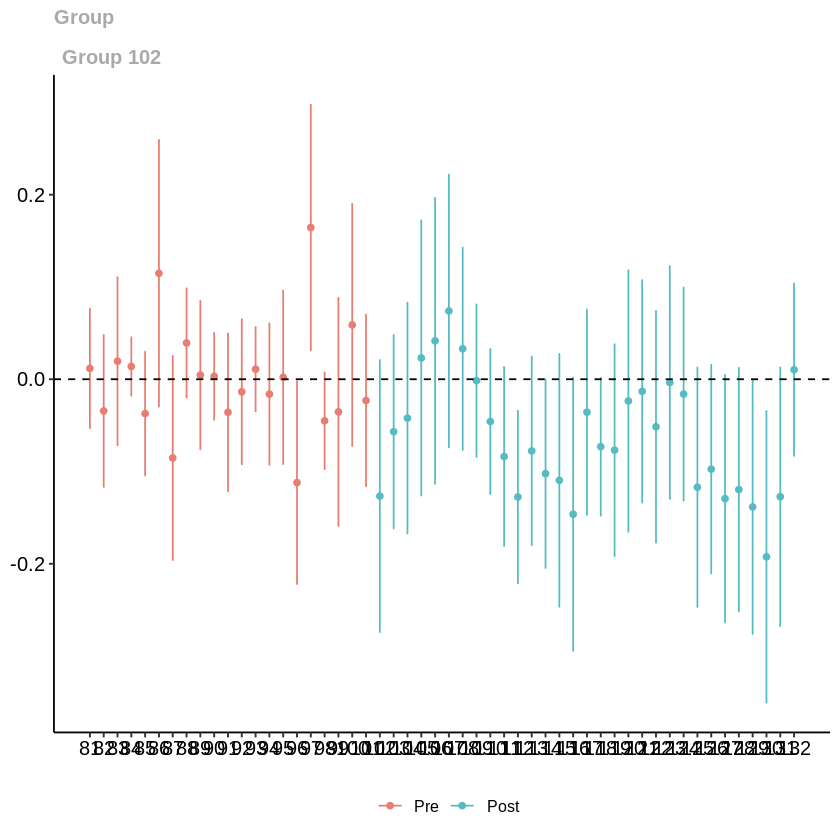

In [21]:
# plot the results
ggdid(my_attgt)

In [22]:
group_effects <- aggte(my_attgt, type = "group")

In [23]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
    ATT    Std. Error     [ 90%  Conf. Int.]  
 -0.063        0.0289    -0.1105     -0.0155 *


Group Effects:
 Group Estimate Std. Error [90% Simult.  Conf. Band]  
   102   -0.063      0.031       -0.1172     -0.0089 *
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust


### 3 Groups (H, ML, X0) with 24 weeks avg Normalization
group 102 = H, group M & L = 103, group X & 0(never treated) = 0

In [ ]:
# Assuming you have a dataframe named df
library(dplyr)

# Define the mapping
mapping <- setNames(c(102, 103, 0), c(1, 2, 0))

# Create the new column
df_filtered <- df_filtered %>%
  mutate(treatment_group_102 = recode(treatment_group, !!!mapping))

In [ ]:
# Print the filtered dataframe
print(df_filtered)

# A tibble: 19,964 × 20
    year  week `year-week` project  page_views lang  Cat    time treatment_group
   <dbl> <dbl> <chr>       <chr>         <dbl> <chr> <chr> <dbl>           <dbl>
 1  2022    18 2022-18     uk.wiki…   34338967 uk    M         0               2
 2  2022    18 2022-18     tn.wiki…      39946 tn    0         0               0
 3  2022    18 2022-18     pt.wiki…   72949862 pt    H         0               1
 4  2022    18 2022-18     ch.wiki…      29842 ch    0         0               0
 5  2022    18 2022-18     haw.wik…      81894 haw   0         0               0
 6  2022    18 2022-18     gl.wiki…    2685126 gl    0         0               0
 7  2022    18 2022-18     ti.wiki…      36163 ti    0         0               0
 8  2022    18 2022-18     azb.wik…    1506891 azb   0         0               0
 9  2022    18 2022-18     sk.wiki…    7288001 sk    0         0               0
10  2022    18 2022-18     mai.wik…     223219 mai   0         0               0
# ℹ 

In [ ]:
## DID effect (multiperiod)
#To estimate group-time average treatment effects, use the att_gt function

my_attgt <- att_gt(yname = "normalized_page_views",
                   tname = "year_week_rank",
                   idname = "lang_rank",
                   gname = "treatment_group_102",
                   xformla= ~quarter_lang,
                   alp = 0.1,
                   data = df_filtered,
                   )

In [ ]:
summary(my_attgt)


Call:
att_gt(yname = "normalized_page_views", tname = "year_week_rank", 
    idname = "lang_rank", gname = "treatment_group_102", xformla = ~quarter_lang, 
    data = df_filtered, alp = 0.1)

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 

Group-Time Average Treatment Effects:
 Group Time ATT(g,t) Std. Error [90% Simult.  Conf. Band]  
   102   72   0.0157     0.0211       -0.0456      0.0770  
   102   73  -0.0297     0.0085       -0.0545     -0.0049 *
   102   74   0.0681     0.0130        0.0303      0.1059 *
   102   75   0.0338     0.0128       -0.0033      0.0709  
   102   76  -0.1274     0.0120       -0.1623     -0.0926 *
   102   77   0.0122     0.0089       -0.0137      0.0380  
   102   78  -0.0164     0.0215       -0.0788      0.0461  
   102   79   0.0356     0.021

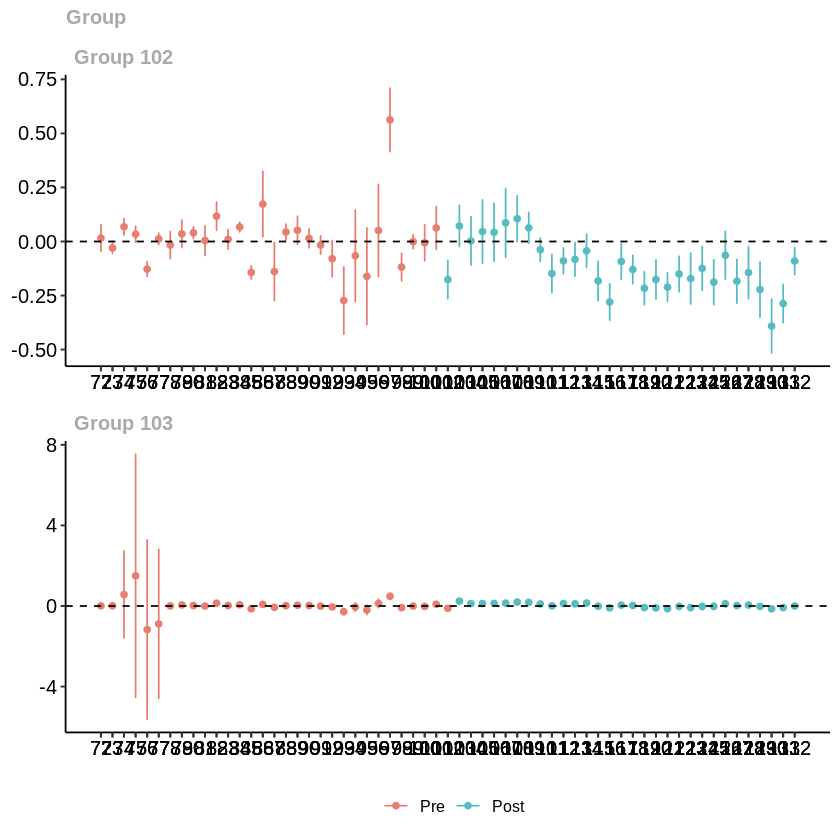

In [ ]:
# plot the results
ggdid(my_attgt)

In [ ]:
group_effects <- aggte(my_attgt, type = "group")

In [ ]:
#Overall summary of ATT
summary(group_effects)


Call:
aggte(MP = my_attgt, type = "group")

Reference: Callaway, Brantly and Pedro H.C. Sant'Anna.  "Difference-in-Differences with Multiple Time Periods." Journal of Econometrics, Vol. 225, No. 2, pp. 200-230, 2021. <https://doi.org/10.1016/j.jeconom.2020.12.001>, <https://arxiv.org/abs/1803.09015> 


Overall summary of ATT's based on group/cohort aggregation:  
     ATT    Std. Error     [ 90%  Conf. Int.] 
 -0.0194        0.0218    -0.0552      0.0165 


Group Effects:
 Group Estimate Std. Error [90% Simult.  Conf. Band]  
   102  -0.1117     0.0187       -0.1465     -0.0768 *
   103   0.0360     0.0313       -0.0225      0.0945  
---
Signif. codes: `*' confidence band does not cover 0

Control Group:  Never Treated,  Anticipation Periods:  0
Estimation Method:  Doubly Robust
